# Linear Regression (One dimensional case)


The idea under the linear regression is looking for the line model that fit better our data points.

$$Y_e = \alpha + \beta x$$

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from jupyterthemes import jtplot


In [2]:
jtplot.style()

In [3]:
np.random.seed(1995)

In [7]:
x = stats.norm(1.5, 2.5).rvs(100)
res = stats.norm(0, 0.3).rvs(100)

y_pred = 5 + 0.3 * x
y_real = 5 + 0.3 * x + res

x = stats.norm(1.5, 2.5).rvs(100)
res = stats.norm(0, 0.3).rvs(100)

y_pred = 5 + 0.3 * x
y_real = 5 + 0.3 * x + res

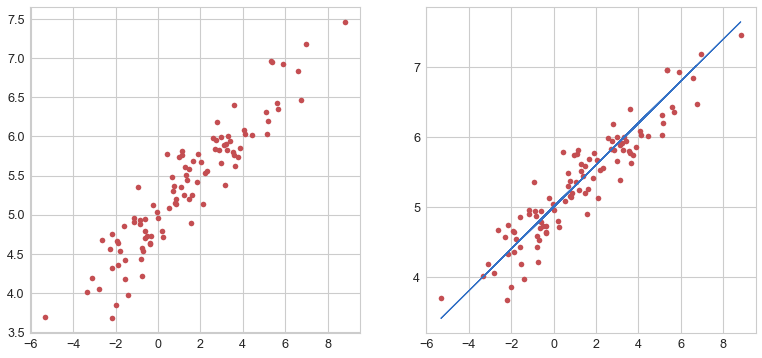

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (13, 6))

ax[0].plot(x, y_real, color = 'r', linestyle = '', marker = 'o')

ax[1].plot(x, y_real, color = 'r', linestyle = '', marker = 'o')
ax[1].plot(x, y_pred, color = 'b');

We'll use the data to looking for $ \ alpha $ and $ \ beta $ statistically significant for our model. With this equation we can realise predictions, but how we can found the parameters?. for this we need focus to the error.

$$e_i = (y_i - Y_e(x_i))$$

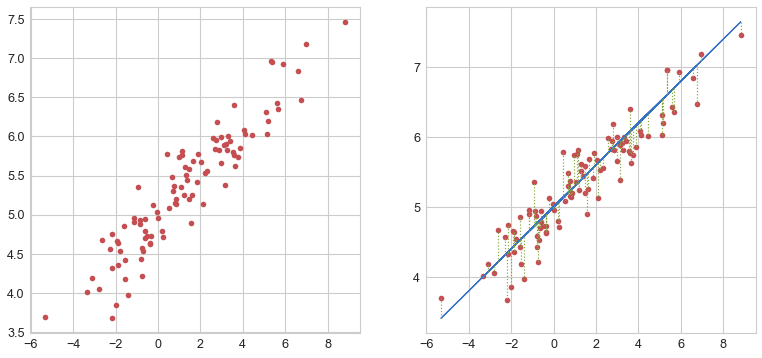

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (13, 6))

ax[0].plot(x, y_real, color = 'r', linestyle = '', marker = 'o')

ax[1].plot(x, y_real, color = 'r', linestyle = '', marker = 'o')
ax[1].plot(x, y_pred, color = 'b')

for x, Y, y in zip(x, y_pred, y_real):
    ax[1].plot([x, x], [Y, y], linestyle = ':', color = 'g');


So, we are going to minimize these errors, that is, we have to minimize the following function.


$$S(\alpha, \beta) =  \sum e_{i}^{2} = \sum (y_i - Y_e(x_i))^2 = \sum (y_i - (\alpha + \beta x_i))^2$$


We will call this function the cost function.

- why do we need to square the error, why is the absolute value not used?



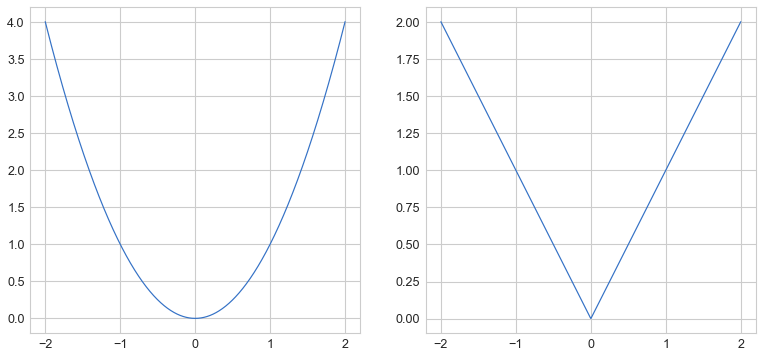

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (13, 6))

x2 = np.linspace(-2, 2, 1000)
ax[0].plot(x2, x2 ** 2)
ax[1].plot(x2, np.abs(x2));

$$S(\alpha, \beta) =  \sum e_{i}^{2} = \sum (y_i - Y_e(x_i))^2 = \sum (y_i - (\alpha + \beta x_i))^2$$

Naturally to minimize we are going to calculate the gradient of this function.


- $\frac{\partial S}{\partial \alpha} = -2 \sum (y_i - \alpha - \beta x_i) = 0$
- $\frac{\partial S}{\partial \beta} = -2 \sum (y_i - \alpha - \beta x_i) x_i = 0$


$$
\left\{
\begin{matrix}
(\sum x_i ) \alpha + (\sum x_{i}^{2}) \beta = \sum y_i x_i\\
n \alpha + (\sum x_i ) \beta = \sum y_i\\
\end{matrix}
\right.
$$

## Exercise

Find the $\alpha$ and $\beta$ parameters and implement the model

$$\alpha = \frac{\sum y_i - (\sum x_i)\beta}{n}$$

$$(\sum x_i) (\frac{\sum y_i - (\sum x_i)\beta}{n}) + (\sum x_i^2)\beta = \sum x_i y_i$$

$$(\sum x_i) (\sum y_i - (\sum x_i)\beta) + n(\sum x_i^2)\beta = n\sum x_i y_i$$

$$\sum x_i\sum y_i - n(\sum x_i)^2\beta) + n(\sum x_i^2)\beta = n\sum x_i y_i$$

$$n(\sum x_i^2)\beta - n(\sum x_i)^2\beta)= n\sum x_i y_i - \sum x_i\sum y_i$$

$$(\sum x_i^2) - (\sum x_i)^2)n\beta= n\sum x_i y_i - \sum x_i\sum y_i$$

$$\beta= \frac{n\sum x_i y_i - \sum x_i\sum y_i}{((\sum x_i^2) - (\sum x_i)^2)n}$$

$$\beta = \frac{cov(x, y)}{var(x)}$$

$$\alpha = \bar{y} - \bar{x}\beta$$

In [11]:
x.var(ddof = 1)

C:\Users\maria\AppData\Local\Temp/ipykernel_21736/1623364483.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  x.var(ddof = 1)
C:\Users\maria\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [12]:
np.cov(x, y_real)[0, 1]

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 100

In [13]:
class LinearRegresor:
    
    def __init__(self):
        
        self.alpha = 0
        self.beta  = 0
        
    def fit(self, x: "np.array", y: "np.array"):
        self.beta = np.cov(x, y)[0, 1] / x.var(ddof = 1)
        self.alpha = y.mean() - self.beta * x.mean()
        
    def predict(self, x):
        return self.alpha + self.beta * x
    

In [14]:
model = LinearRegresor()

In [15]:
model

In [16]:
model.fit(x, y_real)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 100

In [17]:
model.beta, model.alpha

(0, 0)

$$Y = 4.9878845137270575 + 0.27715977274299325 x$$

In [18]:
y_model = model.predict(x)

ValueError: x and y must have same first dimension, but have shapes (1,) and (100,)

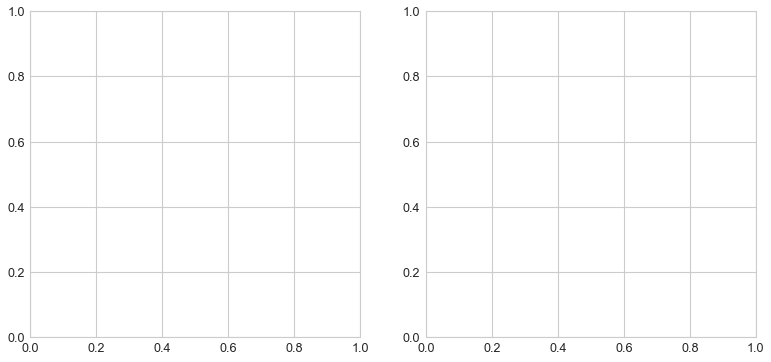

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (13, 6))

ax[0].plot(x, y_real, color = 'r', linestyle = '', marker = 'o')

ax[1].plot(x, y_real, color = 'r', linestyle = '', marker = 'o')
ax[1].plot(x, y_pred, color = 'b')
ax[1].plot(x, y_model, color = 'g');

## How good is our model?

In [20]:
data = pd.DataFrame({'x' : x, "Real Data" : y_real, "Prediction" : y_model})
data.head()

,x,Real Data,Prediction
0,-0.347862,4.857736,0.0
1,-0.347862,3.676235,0.0
2,-0.347862,6.465834,0.0
3,-0.347862,4.325343,0.0
4,-0.347862,5.799365,0.0


In [21]:
def plot_reg(model, mean, point, SSR, SST, SSM):
    
    fig, ax = plt.subplots(figsize = (13, 8))
    
    ax.plot(data['x'], data['Real Data'], 'or', label = 'Real Observation')
    
    if model:
        ax.plot(data['x'], data['Prediction'], label = 'Model')
        
    
    if mean:
        ax.axhline(data['Real Data'].mean(), linestyle = ':', color = 'g', alpha = 0.7, label = 'Mean', lw = 4)
    
    if point:
        ax.plot([-1], [6.5], '*y', markersize = 20)
        
    if SSR:
        ax.plot([-1, -1], [5 + 0.3 * -1, 6.5], '--', color = 'blue', label = 'SSR')
        
    if SST:
        ax.plot([-1, -1], [data['Real Data'].mean(), 6.5], '--', color = 'purple', label = 'SST')
    
    if SSM:
        ax.plot([-1, -1], [data['Real Data'].mean(), 5 + 0.3 * -1], '--', color = 'orange', label = 'SSM')
        
    
    ax.set_xlabel('X', fontsize = 15)
    ax.set_xlabel('Y', fontsize = 15)
    ax.set_title('Model vs Reality', fontsize = 15)
    ax.legend(prop = {'size' : 13})
    
    

In [22]:
interact(plot_reg, model = False, mean = False, point = False, SSR = False, SST = False, SSM = False);

interactive(children=(Checkbox(value=False, description='model'), Checkbox(value=False, description='mean'), C…

- $SSR = \sum (y_i - \hat{y}_i)^2$
- $SST = \sum (y_i - \bar{y})^2$
- $SSM = \sum (\hat{y}_i - \bar{y})^2$


Note that

$$y_i - \bar{y} = (y_i - \hat{y}_i) + (\hat{y}_i - \bar{y})$$

Now squere that.

$$(y_i - \bar{y})^2 = (y_i - \hat{y}_i)^2 + (\hat{y}_i - \bar{y})^2 + 2 (y_i - \hat{y}_i)(\hat{y}_i - \bar{y})$$

$$SST = SSR + SSM + 2 \sum (y_i - \hat{y}_i)(\hat{y}_i - \bar{y})$$


Then we see that $2 \sum (y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) = 0$ for this I think about the following:

$$(y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) = (y_i - \hat{y}_i)\hat{y}_i -  (y_i - \hat{y}_i)\bar{y}$$
$$\sum (y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) = \sum (y_i - \hat{y}_i)\hat{y}_i -  \sum (y_i - \hat{y}_i)\bar{y}$$

And remember that the model found $\beta$ and $\alpha$ assuming:

$$\frac{\partial S}{\partial \alpha} = -2 \sum (y_i - \alpha - \beta x_i) = -2 \sum (y_i - \hat{y}_i)=0$$
$$\frac{\partial S}{\partial \beta} = -2 \sum (y_i - \alpha - \beta x_i) x_i = -2 \sum (y_i - \hat{y}_i) x_i=0$$


Hence

$$\sum (y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) = 0$$


And we conclude that:

$$SST = SSR + SSM$$


<hr>
$$1 = \frac{SSR}{SST} + \frac{SSM}{SST}$$
<hr>
$$1 - \frac{SSR}{SST} = \frac{SSM}{SST}$$
<hr>
$$R^2 = \frac{SSM}{SST}$$
<hr>
$$R^2 = 1 - \frac{SSR}{SST} = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$$



### Exercise

Implement $R^2$

In [23]:
class Animal:
    
    def muerte(self):
        print("se mere :c")
        
    def reproducirse(self):
        print("Se multiplica")
        
    def alimentarse(self):
        print("Ñom ñom ñom...")

In [24]:
leon = Animal()

In [25]:
leon.alimentarse()

Ñom ñom ñom...


In [26]:
leon.reproducirse()

Se multiplica


In [27]:
leon.muerte()

se mere :c


In [28]:
class Ave(Animal):
    
    def volar(self):
        print("Vuela vuela")
        
    def poner_huevos(self):
        print("Pone un Huevo")

In [29]:
aguila = Ave()

In [30]:
aguila.volar()

Vuela vuela


In [31]:
aguila.poner_huevos()

Pone un Huevo


In [32]:
aguila.alimentarse()

Ñom ñom ñom...


In [33]:
aguila.reproducirse()

Se multiplica


In [34]:
aguila.muerte()

se mere :c


In [35]:
class Regressor:
    
    def score(self, y_pred, y_real):
        return 1 - (((y_pred - y_real)**2).sum() / ((y_real - y_real.mean())**2).sum())

In [36]:
class LinearRegresor(Regressor):
    
    def __init__(self):
        
        self.alpha = 0
        self.beta  = 0
        
    def fit(self, x: "np.array", y: "np.array"):
        self.beta = np.cov(x, y)[0, 1] / x.var(ddof = 1)
        self.alpha = y.mean() - self.beta * x.mean()
        
    def predict(self, x):
        return self.alpha + self.beta * x
    

In [37]:
model = LinearRegresor()

In [38]:
model.fit(x, y_real)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 100

In [39]:
y_model = model.predict(x)

In [40]:
model.score(y_model, y_real)

-45.77059936105497

ValueError: x and y must have same first dimension, but have shapes (1,) and (100,)

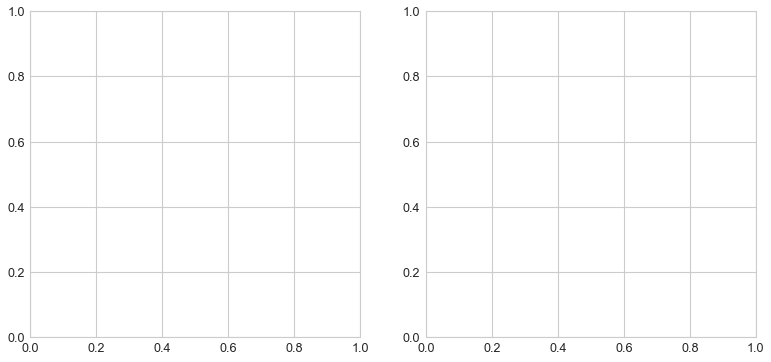

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (13, 6))

r2 = model.score(y_model, y_real)

ax[0].plot(x, y_real, color = 'r', linestyle = '', marker = 'o')
ax[0].set_title("Datos Originales")
ax[1].plot(x, y_real, color = 'r', linestyle = '', marker = 'o')
#ax[1].plot(x, -y_real**2, color = 'b', linestyle = '', marker = 'o')
ax[1].plot(x, y_model, color = 'g')
ax[1].set_title(f"Modelo $R^2$ = {r2}");

## Transform the model


Imagine you have a data set like the one below:

In [42]:
data = pd.read_csv("auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [43]:
data.shape

(406, 9)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


In [45]:
mask = data['mpg'].isna()
data[mask]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
10,NaN,4,133.0,115.0,3090,17.5,70,2,citroen ds-21 pallas
11,NaN,8,350.0,165.0,4142,11.5,70,1,chevrolet chevelle concours (sw)
12,NaN,8,351.0,153.0,4034,11.0,70,1,ford torino (sw)
13,NaN,8,383.0,175.0,4166,10.5,70,1,plymouth satellite (sw)
14,NaN,8,360.0,175.0,3850,11.0,70,1,amc rebel sst (sw)
17,NaN,8,302.0,140.0,3353,8.0,70,1,ford mustang boss 302
39,NaN,4,97.0,48.0,1978,20.0,71,2,volkswagen super beetle 117
367,NaN,4,121.0,110.0,2800,15.4,81,2,saab 900s


In [46]:
data.dropna(inplace=True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


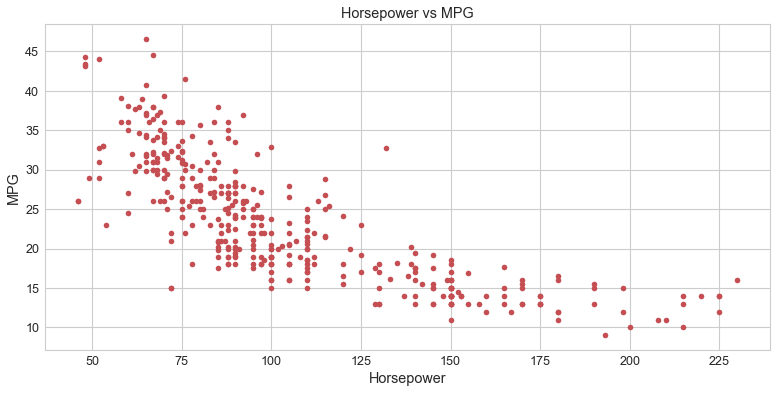

In [48]:
fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(data['horsepower'], data['mpg'], color = 'r', linestyle = '', marker = 'o')
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.set_title("Horsepower vs MPG");

In [49]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


we can see that they are related but what happens if we apply our linear model


$$y = \beta_0 + \beta_1 x$$

In [50]:
x, y = data['horsepower'], data['mpg']

In [51]:
model = LinearRegresor()

In [52]:
model.fit(x, y)

In [53]:
y_pred = model.predict(x)

In [54]:
model.score(y_pred, y)

0.6059482578894348

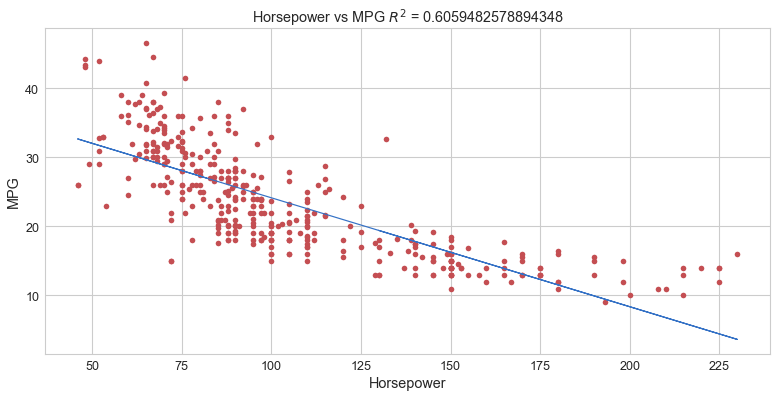

In [55]:
fig, ax = plt.subplots(figsize = (13, 6))

r2 = model.score(y_pred, y)

ax.plot(data['horsepower'], data['mpg'], color = 'r', linestyle = '', marker = 'o')
ax.plot(x, y_pred)
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.set_title(f"Horsepower vs MPG $R^2$ = {r2}");

That doesn't seem to work, but what if we apply a transformation before the regression, this would be equivalent to creating a new variable for the regression

$$y = \beta_0 + \beta_1 x^2$$

In [56]:
model = LinearRegresor()

In [57]:
model.fit(x ** 2, y)

In [58]:
y_pred = model.predict(x ** 2)

In [59]:
model.score(y_pred, y)

0.507367008983261

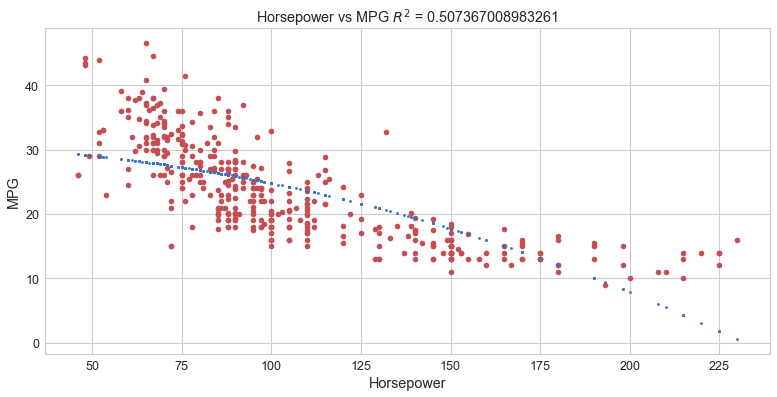

In [60]:
fig, ax = plt.subplots(figsize = (13, 6))

r2 = model.score(y_pred, y)

ax.plot(data['horsepower'], data['mpg'], color = 'r', linestyle = '', marker = 'o')
ax.plot(x, y_pred, linestyle = '', marker = '.')
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.set_title(f"Horsepower vs MPG $R^2$ = {r2}");

$$y = \beta_0 + \beta_1 \frac{1}{x}$$

In [61]:
model = LinearRegresor()

In [62]:
model.fit(1/x, y)

In [63]:
y_pred = model.predict(1/x)

In [64]:
model.score(y_pred, y)

0.6671084785591674

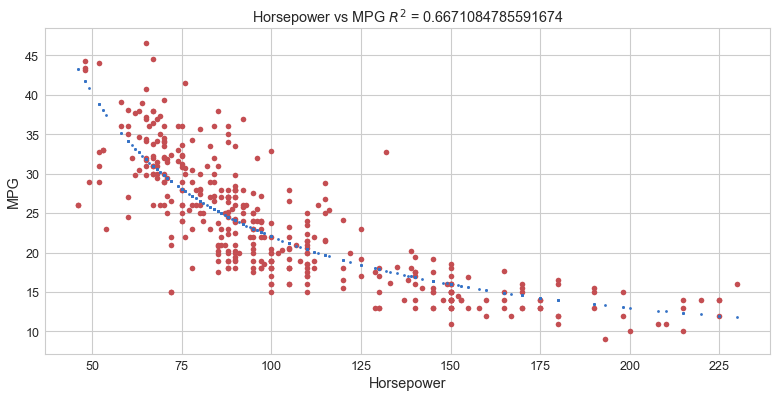

In [65]:
fig, ax = plt.subplots(figsize = (13, 6))

r2 = model.score(y_pred, y)

ax.plot(data['horsepower'], data['mpg'], color = 'r', linestyle = '', marker = 'o')
ax.plot(x, y_pred, linestyle = '', marker = '.')
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.set_title(f"Horsepower vs MPG $R^2$ = {r2}");

That seems to change, but it doesn't work at all better, what if the model was something like that?

$$y = \alpha e^{k x}$$



If that were the case we can linearize by doing the following

$$\ln(y) = \ln(\alpha e^{k x})$$

$$\ln(y) = \ln(\alpha) + \ln(e^{k x})$$
$$\ln(y) = \ln(\alpha) + k x$$

In [66]:
model = LinearRegresor()

In [67]:
model.fit(x, np.log(y))

In [68]:
y_pred = model.predict(x)

In [69]:
model.score(y_pred, np.log(y))

0.6891575108068902

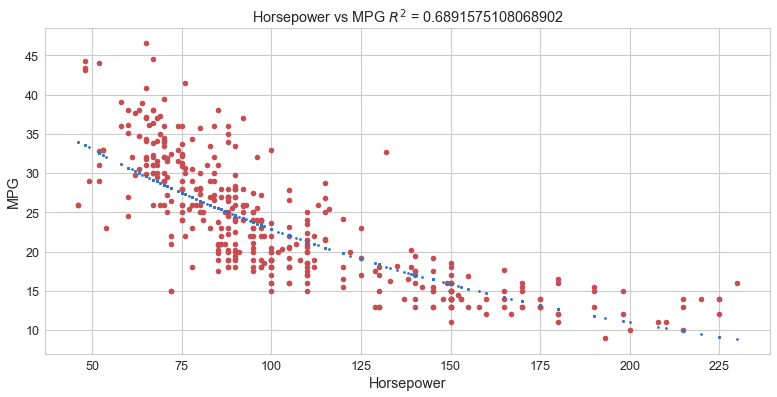

In [70]:
fig, ax = plt.subplots(figsize = (13, 6))

r2 = model.score(y_pred, np.log(y))

ax.plot(data['horsepower'], data['mpg'], color = 'r', linestyle = '', marker = 'o')
ax.plot(x, np.exp(y_pred), linestyle = '', marker = '.')
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.set_title(f"Horsepower vs MPG $R^2$ = {r2}");

$$\ln(y) = \ln(\alpha) + k x$$

In [71]:
model.alpha, model.beta

(3.8644667977294893, -0.00733376409107581)

In [72]:
np.exp(model.alpha)

47.67784371944308

$$y = 47.677843719443146 e^{-0.007333764091075806x}$$

### Exercise, Moore's law


Moore's law is the observation that the number of transistors in a dense integrated circuit (IC) doubles about every two years.

In [103]:
data = pd.read_csv('moore.csv', delimiter='\t',
                   names = ['Model', 'Transistors', 'Year', 'Company', 'TS', 'area'])

In [104]:
data

,Model,Transistors,Year,Company,TS,area
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²
...,...,...,...,...,...,...
97,IBM z13,"3,990,000,000",2015,IBM,22 nm,678 mm²
98,IBM z13 Storage Controller,"7,100,000,000",2015,IBM,22 nm,678 mm²
99,Quad-core + GPU GT2 Core i7 Skylake K,"cca 1,750,000,000",2015,Intel,14 nm,122 mm²
100,SPARC M7,"10,000,000,000[37]",2015,Oracle,20 nm,NaN


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Model        102 non-null    object
 1   Transistors  102 non-null    object
 2   Year         102 non-null    object
 3   Company      102 non-null    object
 4   TS           97 non-null     object
 5   area         95 non-null     object
dtypes: object(6)
memory usage: 4.9+ KB


In [106]:
data['Year'].values

array(['1971', '1972', '1974', '1974', '1974', '1974[7]', '1975', '1976',
       '1976', '1978', '1978', '1979', '1979', '1981', '1982', '1982',
       '1983', '1984', '1985', '1985', '1985[13]', '1986', '1987', '1988',
       '1988', '1989', '1989', '1991', '1991', '1993', '1994', '1995',
       '1995', '1996', '1997', '1997', '1998', '1999', '1999', '1999',
       '1999', '1999', '2000', '2000', '2001', '2002', '2002', '2003',
       '2003', '2003', '2004', '2004', '2005', '2005', '2006', '2006',
       '2006', '2006', '2006', '2007', '2007', '2007', '2007', '2007',
       '2008', '2008', '2008', '2008', '2008', '2009', '2010', '2010',
       '2010', '2010', '2010', '2010', '2011', '2011', '2011', '2012',
       '2012', '2012', '2012', '2012', '2012', '2012', '2013', '2013',
       '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014',
       '2015', '2015', '2015', '2015', '2015', '2016'], dtype=object)

In [107]:
data['Transistors'].values

array(['2,300', '3,500', '4,500', '4,100', '5,000', '8,000', '3,510[8]',
       '6,500', '8,500', '29,000', '9,000', '29,000', '68,000',
       '11,500[9]', '55,000', '134,000', '22,000[10]', '190,000[11]',
       '25,000[11]', '275,000', '16,000[12]', '30,000[11]', '553,000[15]',
       '180,000[16]', '250,000[17]', '300,000', '1,180,235', '35,000',
       '1,350,000', '3,100,000', '578,977[18]', '5,500,000[19]',
       '2,500,000[11]', '4,300,000', '8,800,000', '7,500,000',
       '7,500,000', '21,300,000', '22,000,000', '111,000[11]',
       '27,400,000', '9,500,000', '42,000,000', '21,000,000',
       '45,000,000', '220,000,000', '55,000,000', '105,900,000',
       '54,300,000', '410,000,000', '592,000,000', '112,000,000',
       '169,000,000', '228,000,000', '241,000,000', '291,000,000',
       '1,700,000,000[26]', '184,000,000', '362,000,000',
       '463,000,000[20]', '26,000,000[21]', '169,000,000', '411,000,000',
       '789,000,000', '758,000,000[20]', '47,000,000', '230,000,

In [108]:
int(data['Year'].values[5].split('[')[0])

1974

In [109]:
data['Year'] = data['Year'].apply(lambda x: int(x.split('[')[0]))

In [110]:
data['Year']

0      1971
1      1972
2      1974
3      1974
4      1974
       ... 
97     2015
98     2015
99     2015
100    2015
101    2016
Name: Year, Length: 102, dtype: int64

In [111]:
s = data['Transistors'].values[-1]
s = s.replace(',', '')
s = s.replace('~', '')
s = float(s.split('[')[0])

In [112]:
s

7200000000.0

In [113]:
def transistor_cleaner(s):
    s = s.replace(',', '')
    s = s.replace('~', '')
    s = s.replace(' ', '')
    
    for c in s:
        if c.isalpha():
            s = s.replace(c, '')
    
    s = float(s.split('[')[0])
    return s

In [115]:
transistor_cleaner(data['Transistors'].values[-1])

7200000000.0

In [116]:
data['Transistors'] = data['Transistors'].apply(transistor_cleaner)

In [117]:
for c in 'asb3d3':
    if not c.isalpha():
        print(c)

3
3


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        102 non-null    object 
 1   Transistors  102 non-null    float64
 2   Year         102 non-null    int64  
 3   Company      102 non-null    object 
 4   TS           97 non-null     object 
 5   area         95 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.9+ KB


In [119]:
data.corr()

,Transistors,Year
Transistors,1.000000,0.577718
Year,0.577718,1.000000


In [120]:
x, y = data['Year'], data['Transistors']

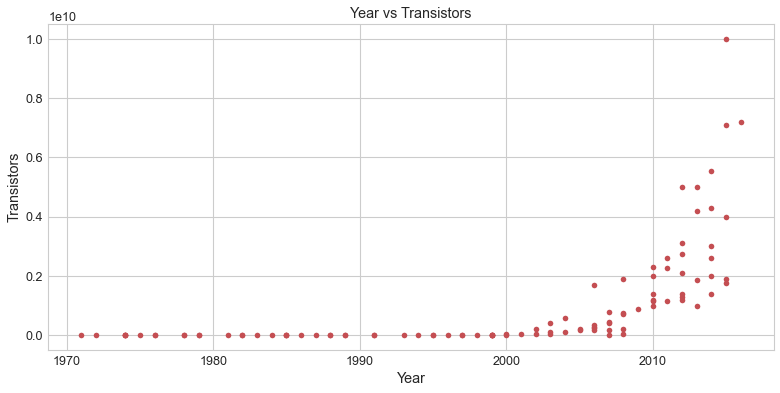

In [121]:
fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(data['Year'], data['Transistors'], color = 'r', linestyle = '', marker = 'o')
ax.set_xlabel("Year")
ax.set_ylabel("Transistors")
ax.set_title("Year vs Transistors");

In [122]:
model = LinearRegresor()

In [133]:
model.fit(np.log(x),y)

In [134]:
y_pred = model.predict(np.log(x))

In [135]:
model.score(y_pred, y)

0.3322072016569737

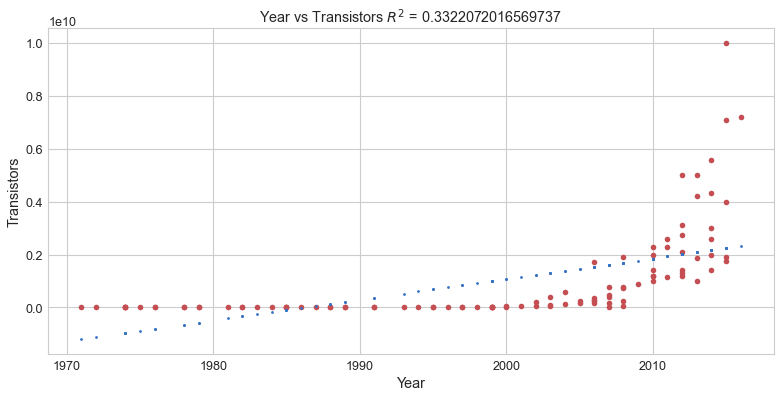

In [137]:
fig, ax = plt.subplots(figsize = (13, 6))

r2 = model.score(y_pred, y)

ax.plot(data['Year'], data['Transistors'], color = 'r', linestyle = '', marker = 'o')
ax.plot(x, y_pred, linestyle = '', marker = '.')
ax.set_xlabel("Year")
ax.set_ylabel("Transistors")
ax.set_title(f"Year vs Transistors $R^2$ = {r2}");
